# Conduct reversal test on directional data in MagIC format using PmagPy

## Introduction

This notebook is a template for importing data and conducting a reversal test using PmagPy. You can use it on any MagIC contribution with dual polarity site data. The example that is given is on paleomagnetic directional data from the following study:

> Behar, N., Shaar, R., Tauxe, L., Asefaw,
H., Ebert, Y., Heimann, A., et al. (2019).
Paleomagnetism and paleosecular
variations from the Plio‐Pleistocene
Golan Heights volcanic plateau, Israel.
Geochemistry, Geophysics, Geosystems,
20 https://doi.org/10.1029/2019GC008479

### Change the MagIC contribution

You can change what study this notebook is applied to by changing the `magic_id` in the **Download data and unpack data** code cel below.

### Apply to your own `sites.txt` data

You can also substitute in your own MagIC format `sites.txt` file. To do this, skip the **Download data and unpack data** section and go to the **Import the sites table** section after running the **Import packages** code.

## Import packages

In [1]:
import pmagpy.ipmag as ipmag
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format='retina'

## Download and unpack data

### Download MagIC contribution

Following the steps in the 
`Inspecting_MagIC_directional_data.ipynb`
notebook, we can first download the data from MagIC.
If the directory name that is given is not provided, it will be created.
In the example, the data are put into a folder within this directory that is named `reversal_test_data`.

In [20]:
magic_id='19904'
directory = './reversal_test_data'
result, magic_file_path = ipmag.download_magic_from_id(magic_id, directory=directory)

### Unpack the MagIC file

MagIC contributions are made up of distinct tables that can be unpacked. In this case, we are going to do a reversal test on the site level data so we are particularly interested in unpacking the `sites.txt` table from the MagIC file.

In [21]:
ipmag.unpack_magic(magic_file_path,dir_path=directory, print_progress=False)

1  records written to file  /Users/penokean/0000_GitHub/PmagPy-docs/example_notebooks/template_notebooks/reversal_test_data/contribution.txt
1  records written to file  /Users/penokean/0000_GitHub/PmagPy-docs/example_notebooks/template_notebooks/reversal_test_data/locations.txt
48  records written to file  /Users/penokean/0000_GitHub/PmagPy-docs/example_notebooks/template_notebooks/reversal_test_data/sites.txt


True

### Import the sites table

We can now use pandas to import the sites table to a pandas dataframe using the function `pd.read_csv()`.

We need to point `pd.read_csv()` to the file which with the above steps has the location and name of `'reversal_test/sites.txt'`. This can be changed if the file is in a different place or has a different name. For example, if it is in the same directory as the notebook it can be: `'sites.txt'`

In [22]:
# change the sites_file path if you want to use a file in a different directory
sites_file = directory + '/sites.txt'
sites = pd.read_csv(sites_file,sep='\t',header=1)
sites.head()

,age_high,age_low,age_unit,citations,dir_dec,dir_inc,dir_tilt_correction,geologic_classes,geologic_types,height,lat,lithologies,location,lon,method_codes,site
0,23,17,Ma,10.1029/JB095iB04p04597,198.1,-39.7,100,Sedimentary,Sediment Layer,0.0,34.75,Silt,Hector Formation,116.0,LP-DIR-T:LP-DIR-AF:DE-BFL,340.0
1,23,17,Ma,10.1029/JB095iB04p04597,62.1,42.5,100,Sedimentary,Sediment Layer,21.0,34.75,Silt,Hector Formation,116.0,LP-DIR-T:LP-DIR-AF:DE-BFL,342.0
2,23,17,Ma,10.1029/JB095iB04p04597,32.8,48.6,100,Sedimentary,Sediment Layer,27.0,34.75,Silt,Hector Formation,116.0,LP-DIR-T:LP-DIR-AF:DE-BFL,344.0
3,23,17,Ma,10.1029/JB095iB04p04597,22.8,32.9,100,Sedimentary,Sediment Layer,30.0,34.75,Silt,Hector Formation,116.0,LP-DIR-T:LP-DIR-AF:DE-BFL,351.0
4,23,17,Ma,10.1029/JB095iB04p04597,55.0,23.6,100,Sedimentary,Sediment Layer,39.0,34.75,Silt,Hector Formation,116.0,LP-DIR-T:LP-DIR-AF:DE-BFL,349.0


### Filter by tilt correction

When there are data in both geographic coordinates (without correction for bedding tilt) and data in tilt corrected coordinates, they each get their own row with different values in the `dir_tilt_correction` column:

- 0: No tilt correction applied. The data are in the geographic coordinate system (i.e., as they are currently oriented in the field).
- 100: Full (100%) tilt correction applied. The data are in the paleohorizontal coordinate system, meaning they have been corrected for tilting to represent their original horizontal position. 

In the example dataset, the authors consider the lavas of the Plio‐Pleistocene
Golan Heights volcanic plateau to be untilted. As a result, all the entries have a `dir_tilt_correction` of 0. 
For completeness, we will filter and make a `sites_geo` dataframe where `dir_tilt_correction` is 0 and 
a `sites_tc` dataframe where `dir_tilt_correction` is 100. For this example, `sites_tc` will be empty but 
it will be populated for a MagIC contribution where there are tilt-corrected data.

In [23]:
sites_geo = sites[sites['dir_tilt_correction'] == 0]
sites_tc = sites[sites['dir_tilt_correction'] == 100]

In [24]:
sites_tc

,age_high,age_low,age_unit,citations,dir_dec,dir_inc,dir_tilt_correction,geologic_classes,geologic_types,height,lat,lithologies,location,lon,method_codes,site
0,23,17,Ma,10.1029/JB095iB04p04597,198.1,-39.7,100,Sedimentary,Sediment Layer,0.0,34.75,Silt,Hector Formation,116.0,LP-DIR-T:LP-DIR-AF:DE-BFL,340.0
1,23,17,Ma,10.1029/JB095iB04p04597,62.1,42.5,100,Sedimentary,Sediment Layer,21.0,34.75,Silt,Hector Formation,116.0,LP-DIR-T:LP-DIR-AF:DE-BFL,342.0
2,23,17,Ma,10.1029/JB095iB04p04597,32.8,48.6,100,Sedimentary,Sediment Layer,27.0,34.75,Silt,Hector Formation,116.0,LP-DIR-T:LP-DIR-AF:DE-BFL,344.0
3,23,17,Ma,10.1029/JB095iB04p04597,22.8,32.9,100,Sedimentary,Sediment Layer,30.0,34.75,Silt,Hector Formation,116.0,LP-DIR-T:LP-DIR-AF:DE-BFL,351.0
4,23,17,Ma,10.1029/JB095iB04p04597,55.0,23.6,100,Sedimentary,Sediment Layer,39.0,34.75,Silt,Hector Formation,116.0,LP-DIR-T:LP-DIR-AF:DE-BFL,349.0
5,23,17,Ma,10.1029/JB095iB04p04597,28.5,53.4,100,Sedimentary,Sediment Layer,41.0,34.75,Silt,Hector Formation,116.0,LP-DIR-T:LP-DIR-AF:DE-BFL,346.0
6,23,17,Ma,10.1029/JB095iB04p04597,44.5,59.8,100,Sedimentary,Sediment Layer,47.0,34.75,Silt,Hector Formation,116.0,LP-DIR-T:LP-DIR-AF:DE-BFL,353.0
7,23,17,Ma,10.1029/JB095iB04p04597,189.4,-53.0,100,Sedimentary,Sediment Layer,55.0,34.75,Silt,Hector Formation,116.0,LP-DIR-T:LP-DIR-AF:DE-BFL,348.0
8,23,17,Ma,10.1029/JB095iB04p04597,202.2,-24.5,100,Sedimentary,Sediment Layer,69.0,34.75,Silt,Hector Formation,116.0,LP-DIR-T:LP-DIR-AF:DE-BFL,357.0
9,23,17,Ma,10.1029/JB095iB04p04597,216.2,-22.8,100,Sedimentary,Sediment Layer,69.0,34.75,Silt,Hector Formation,116.0,LP-DIR-T:LP-DIR-AF:DE-BFL,359.0


### Make declination/inclination lists

We can extract specific columns from the dataframe by using the nomenclature `dataframe_name['column_name']`. In this case, we want to conduct a reversal test on the data in the `sites_geo` dataframe and are interested in the directional data which are the declination column `dir_dec` and the inclination column `dir_inc`. So using the code `sites['dir_dec']` will give us all the declinations which we can assign to a variable `sites_dec`.

If you wanted to do the test on the `sites_tc` data, you would switch in `sites_tc` for `sites_geo` in the text below.

In [25]:
sites_dec = sites_tc['dir_dec']
sites_inc = sites_tc['dir_inc']

In [26]:
print(sites_dec)

0     198.1
1      62.1
2      32.8
3      22.8
4      55.0
5      28.5
6      44.5
7     189.4
8     202.2
9     216.2
10      3.8
11    216.8
12    222.5
13    202.3
14    211.9
15      1.3
16     27.2
17    192.2
18     48.1
19     30.2
20    190.5
21     20.5
22    220.4
23     26.7
24     38.1
25     48.6
26     67.5
27     52.1
28    193.7
29     17.0
30    356.6
31    353.8
32     28.5
33    345.3
34     16.9
35    352.0
36    196.6
37    160.0
38    186.3
39    195.8
40    139.6
41    173.3
42    168.1
43    131.2
44    180.2
45    205.0
46    147.9
47    141.1
Name: dir_dec, dtype: float64


## Reversal tests

Now that we have extracted the declination and inclination values, let's conduct reversal tests on these data using the functions `ipmag.reversal_test_bootstrap` and `ipmag.reversal_test_MM1990`.

### Conduct the bootstrap reversal test

Let's go ahead and do the bootstrap reversal test using this `ipmag.reversal_test_bootstrap()` function.

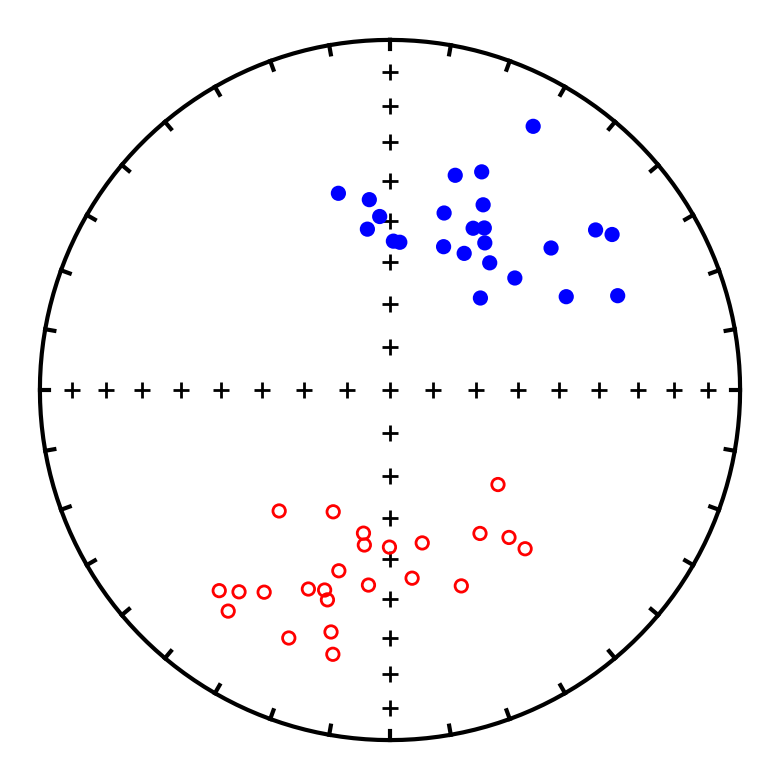

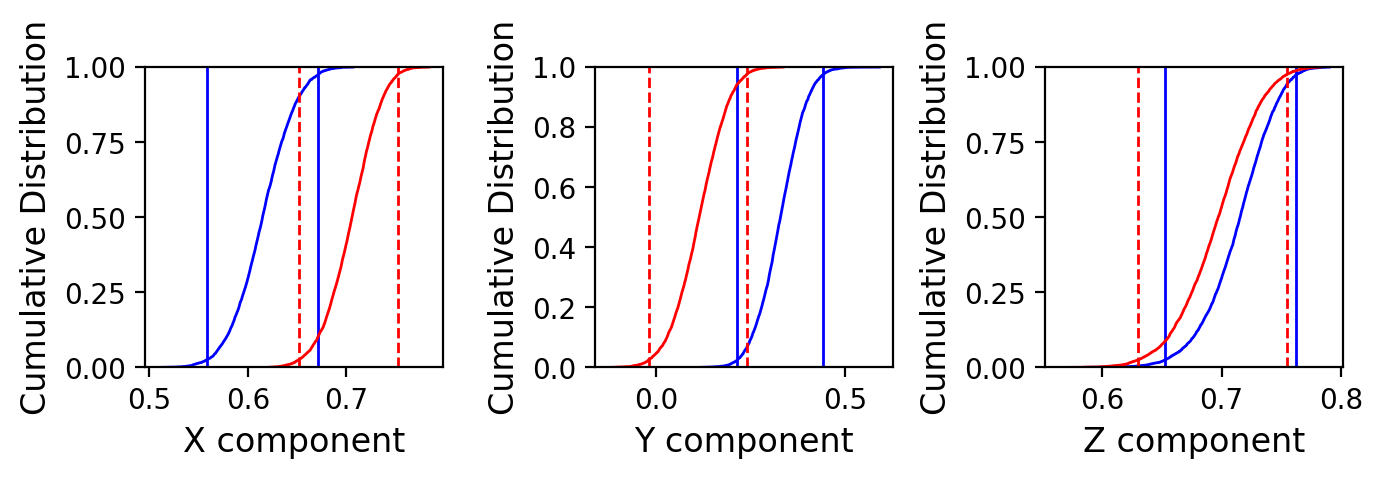

Pass


1

In [32]:
ipmag.reversal_test_bootstrap(dec=sites_dec,
                              inc=sites_inc,
                              plot_stereo = True)

### Learn about the function

To learn more about this function we can type `ipmag.reversal_test_bootstrap?` in a code cell.

In [28]:
ipmag.reversal_test_bootstrap?

Signature:
ipmag.reversal_test_bootstrap(
    dec=None,
    inc=None,
    di_block=None,
    plot_stereo=False,
    color1='blue',
    color2='red',
    save=False,
    save_folder='.',
    fmt='svg',
)
Docstring:
Conduct a reversal test using bootstrap statistics (Tauxe, 2010) to
determine whether two populations of directions could be from an antipodal
common mean.

Parameters:
    dec: list of declinations
    inc: list of inclinations
    di_block: a nested list of [dec,inc]
        A di_block can be provided in which case it will be used instead of
        dec, inc lists.
    plot_stereo : before plotting the CDFs, plot stereonet with the
        bidirectionally separated data (default is False)
    save : boolean argument to save plots (default is False)
    save_folder : directory where plots will be saved (default is current directory, '.')
    fmt : format of saved figures (default is 'svg')

Returns:
    A boolean where 0 is fail and 1 is pass is returned. 
    Plots of the c

### Conduct the Watson common mean reversal test

We can do the Watson common mean test (together with McFadden and McElhinny (1990) classification) as well:

In [29]:
ipmag.reversal_test_MM1990(dec=sites_dec,
                           inc=sites_inc)

Results of Watson V test: 

Watson's V:           9.2
Critical value of V:  6.5
"Fail": Since V is greater than Vcrit, the two means can
be distinguished at the 95% confidence level.

M&M1990 classification:

Angle between data set means: 13.4
Critical angle for M&M1990:   11.2



(0, 13.36386019629975, 11.197090525992087, '')

In [30]:
ipmag.reversal_test_MM1990?

Signature:
ipmag.reversal_test_MM1990(
    dec=None,
    inc=None,
    di_block=None,
    plot_CDF=False,
    plot_stereo=False,
    save=False,
    save_folder='.',
    fmt='svg',
)
Docstring:
Calculates Watson's V statistic from input files through Monte Carlo
simulation in order to test whether normal and reversed populations could
have been drawn from a common mean. Also provides the critical angle between 
the two sample mean directions and the corresponding McFadden and McElhinny 
(1990) classification. This function is a wrapper around the 
ipmag.common_mean_watson() function with the first step of splitting
the data into two polarities using the pmag.flip() function and flipping
the reverse direction to their antipode.

 Parameters:
    dec (list, optional): List of declinations.
    inc (list, optional): List of inclinations.
    di_block (list of lists, optional): Nested list of [dec,inc]. If provided, it 
        takes precedence over separate dec and inc lists.
    plot_CDF